In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Felipe/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
import pandas as pd
import seaborn as sns
import csv
import math
import vincent
import json
vincent.core.initialize_notebook()


In [13]:

import vincent
world_topo='https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/world-countries.json'
geo_data = [{'name': 'countries',
             'url': world_topo,
             'feature': 'world-countries'}]

vis = vincent.Map(geo_data=geo_data, scale=200)
vis.to_json('vega.json')
vis.display()




import vincent
world_topo='https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/world-countries.topo.json'
geo_data = [{'name': 'countries',
             'url': world_topo,
             'feature': 'world-countries'}]

vis = vincent.Map(geo_data=geo_data, scale=200)
vis.to_json('vega.json')
vis.display()

In [15]:
county_topo='https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/us_counties.topo.json'
state_topo='https://raw.githubusercontent.com/wrobstory/vincent_map_data/master/us_states.topo.json'
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'},
            {'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}
             ]

vis = vincent.Map(geo_data=geo_data, scale=1000, projection='albersUsa')
#Get rid of State fill, customize stroke color
del vis.marks[1].properties.update
vis.marks[0].properties.update.fill.value = '#084081'
vis.marks[1].properties.enter.stroke.value = '#fff'
vis.marks[0].properties.enter.stroke.value = '#7bccc4'
vis.display()

In [16]:
import json
import pandas as pd
#Map the county codes we have in our geometry to those in the
#county_data file, which contains additional rows we don't need
with open('us_counties.topo.json', 'r') as f:
    get_id = json.load(f)

#A little FIPS code type casting to ensure keys match
new_geoms = []
for geom in get_id['objects']['us_counties.geo']['geometries']:
    geom['properties']['FIPS'] = int(geom['properties']['FIPS'])
    new_geoms.append(geom)

get_id['objects']['us_counties.geo']['geometries'] = new_geoms

with open('us_counties.topo.json', 'w') as f:
    json.dump(get_id, f)

#Grab the FIPS codes and load them into a dataframe
geometries = get_id['objects']['us_counties.geo']['geometries']
county_codes = [x['properties']['FIPS'] for x in geometries]
county_df = pd.DataFrame({'FIPS': county_codes}, dtype=str)
county_df = county_df.astype(int)

#Read county unemployment data into Dataframe, cast to int for consistency
a=list(csv.reader(open('Unemployment.csv'), delimiter=';'))

states=[]
states.append(a[0][0:-2])
counties=[]
counties.append(a[0][0:-2])
for i in range(1,len(a)-1):
    a[i]=['0' if x=='' else x for x in a[i]]
    a[i][1]='0'
    a[i][2]='0'
    
    if(int(a[i][0])%1000==0):
        states.append(a[i][0:-2])
    else:
        counties.append(list(np.array(a[i][0:-2],dtype=np.float)))

df=pd.DataFrame(counties[1:][:],columns=counties[0][:])
df['FIPS'] = df['FIPS'].astype(int)


#Perform an inner join, pad NA's with data from nearest county
merged = pd.merge(df, county_df, on='FIPS', how='inner')
merged = merged.fillna(method='pad')
merged['FIPS'] = merged['FIPS'].map(lambda i: str(i).zfill(5))

In [17]:
from vincent import AxisProperties, PropertySet, ValueRef
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=merged, geo_data=geo_data, scale=1100,
                  projection='albersUsa', data_bind='Unemployed_2011',
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'})
vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.2)
#Change our domain for an even inteager
vis.scales['color'].domain = [0, 189000]
vis.legend(title='Number Unemployed 2011')
vis.to_json('vega.json',html_out=True, html_path='bar_template.html')
vis.display()

In [18]:

vis.rebind(column='Unemployment_rate_2011', brew='YlGnBu')
vis.to_json('vega.json')
vis.display()

In [19]:
import json
import pandas as pd
#Map the county codes we have in our geometry to those in the
#county_data file, which contains additional rows we don't need
with open('us_counties.topo.json', 'r') as f:
    get_id = json.load(f)

#A little FIPS code type casting to ensure keys match
new_geoms = []
for geom in get_id['objects']['us_counties.geo']['geometries']:
    geom['properties']['FIPS'] = int(geom['properties']['FIPS'])
    new_geoms.append(geom)

get_id['objects']['us_counties.geo']['geometries'] = new_geoms

with open('us_counties.topo.json', 'w') as f:
    json.dump(get_id, f)

#Grab the FIPS codes and load them into a dataframe
geometries = get_id['objects']['us_counties.geo']['geometries']
county_codes = [x['properties']['FIPS'] for x in geometries]
county_df = pd.DataFrame({'FIPS': county_codes}, dtype=str)
county_df = county_df.astype(int)

#Read county unemployment data into Dataframe, cast to int for consistency
a=list(csv.reader(open('BEA_County_Population_1969_2015(1).csv')))
a[0][0]='FIPS'
states=[]
states.append(a[0][0:-2])
counties=[]
counties.append(a[0][0:-2])
for i in range(1,len(a)-1):
    a[i]=['0' if x=='' else x for x in a[i]]
    a[i][1]='0'
    a[i][2]='0'
    a[i][3]='0'
    a[i][4]='0'
    a[i][5]='0'
    a[i][6]='0'
    
    for j in range(len(a[i])):
        if(a[i][j]=='(NA)'):
            a[i][j]='0'
    counties.append(list(np.array(a[i][0:-2],dtype=np.float)))

df=pd.DataFrame(counties[1:][:],columns=counties[0][:])
df['FIPS'] = df['FIPS'].astype(int)
print df

#Perform an inner join, pad NA's with data from nearest county
merged = pd.merge(df, county_df, on='FIPS', how='inner')
merged = merged.fillna(method='pad')
merged['FIPS'] = merged['FIPS'].map(lambda i: str(i).zfill(5))




       FIPS  geoname  region  table  linecode  industryclassification  \
0      1001      0.0     0.0    0.0       0.0                     0.0   
1      1003      0.0     0.0    0.0       0.0                     0.0   
2      1005      0.0     0.0    0.0       0.0                     0.0   
3      1007      0.0     0.0    0.0       0.0                     0.0   
4      1009      0.0     0.0    0.0       0.0                     0.0   
5      1011      0.0     0.0    0.0       0.0                     0.0   
6      1013      0.0     0.0    0.0       0.0                     0.0   
7      1015      0.0     0.0    0.0       0.0                     0.0   
8      1017      0.0     0.0    0.0       0.0                     0.0   
9      1019      0.0     0.0    0.0       0.0                     0.0   
10     1021      0.0     0.0    0.0       0.0                     0.0   
11     1023      0.0     0.0    0.0       0.0                     0.0   
12     1025      0.0     0.0    0.0       0.0      

In [20]:
from vincent import AxisProperties, PropertySet, ValueRef
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

year='Y'+str(1969)
    
    

vis = vincent.Map(data=merged, geo_data=geo_data, scale=1100,
                  projection='albersUsa', data_bind=year,
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'})
vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.2)
#Change our domain for an even integer
#vis.scales['color'].domain = [0, merged.max()['Y1969']]
vis.scales['color'].domain = [0, 100000]
vis.legend(title='Population '+ year)
vis.to_json('vega.json',html_out=True, html_path='bar_template.html')
vis.display()

In [10]:

year='Y'+str(1974)
    
    

vis = vincent.Map(data=merged, geo_data=geo_data, scale=1100,
                  projection='albersUsa', data_bind=year,
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'})
vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.2)
#Change our domain for an even integer
#vis.scales['color'].domain = [0, merged.max()['Y1969']]
vis.scales['color'].domain = [0, 100000]
vis.legend(title='Population '+ year)
vis.to_json('vega.json',html_out=True, html_path='bar_template.html')
vis.display()

In [21]:
mig=list(csv.reader(open('county_migration_data.csv'), delimiter='\t'))



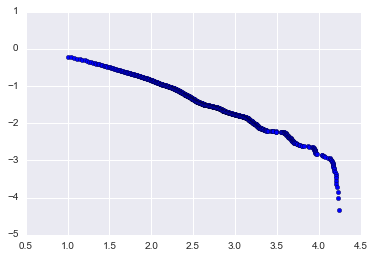

In [22]:
LaIN=[]
for element in mig:
    if ((element[1])=='06037'):
        LaIN.append(np.array(element,dtype=np.int))

        

nearest=(array(LaIN, dtype=np.int)[:,2:]).flatten()
#print size(nearest)
bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
values, base = np.histogram(nearest, bins=bins, density=1)
u, indices = np.unique(np.cumsum(values), return_index=True)
init=bins[:-1]
x=[init[j] for j in indices]
#scatter(log10(init),log10(1-np.cumsum(values)))
scatter(log10(x),log10(1-u))
show()

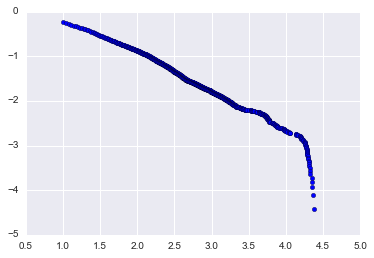

In [23]:
LaOUT=[]
for element in mig:
    if ((element[0])=='06037'):
        LaOUT.append(np.array(element,dtype=np.int))
        
        
        
nearest=(array(LaOUT, dtype=np.int)[:,2:]).flatten()

bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
values, base = np.histogram(nearest, bins=bins, density=1)
u, indices = np.unique(np.cumsum(values), return_index=True)
init=bins[:-1]
x=[init[j] for j in indices]
#scatter(log10(init),log10(1-np.cumsum(values)))
scatter(log10(x),log10(1-u))
show()



In [45]:
OUTS=[]
countyInt='06037'
for i in a:
    tent=[i[0],i[1]]
    
    if (len(i[0])>4): ##to account for non headers
        #print i[0]
        tent[1]=0
        for element in mig:
            if ((element[0]==countyInt) & (element[1]==tent[0])):
                tent[1]=element[-1] #2014 data
        
    OUTS.append(tent)


In [52]:
df=pd.DataFrame(OUTS[1:][:],columns=OUTS[0][:])
df['FIPS'] = df['FIPS'].astype(int)
merged = pd.merge(df, county_df, on='FIPS', how='inner')
merged = merged.fillna(method='pad')
merged['FIPS'] = merged['FIPS'].map(lambda i: str(i).zfill(5))


geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

year='geoname'
    
    

vis = vincent.Map(data=merged, geo_data=geo_data, scale=1100,
                  projection='albersUsa', data_bind=year,
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'})
vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.2)
#Change our domain for an even integer
#vis.scales['color'].domain = [0, merged.max()['Y1969']]
vis.scales['color'].domain = [0, 1000]
vis.legend(title='Population '+ year)
vis.to_json('vega.json',html_out=True, html_path='bar_template.html')
vis.display()
